<a href="https://colab.research.google.com/github/ZhangxjMia/Python/blob/main/used_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used Car Price Prediction

## Project Description
> As per reports Cars growth of new cars in the upcoming 5 years is an average of 3.5% while for used cars 5% and the ratio of used cars to new cars is increasing continuously. So the used cars market is increasing day by day and a consumer wants the best resale price of his car.

Currently, if anyone wants to sell their car either they have to take their car to a respective company workshop or have to make an appointment for the company to get an estimate of the price. This process involves a lot of time and resources. Our Objective is to make a model for third-party companies that will make an estimate of the Price of the customer’s car directly from their online portal. This will save customers time and help the company to reduce its cost and also streamline the process of selling used cars.

## Data Dictionary

|Attribute|Description|
|---------|-----------|
|Name|The brand and model of the car|
|Location|The location in which the car is being sold or is available for purchase|
|Year|The year or edition of the model|
|Kilometers_Driven|The total kilometers driven in the car by the previous owner(s) in KM|
|Fuel_Type|The type of fuel used by the car|
|Transmission|The type of transmission used by the car|
|Owner_Type|Whether the ownership is Firsthand, Second hand or other|
|Mileage|The standard mileage offered by the car company in kmpl or km/kg|
|Engine|The displacement volume of the engine in cc|
|Power|The maximum power of the engine in bhp|
|Seats|The number of seats in the car|
|New_Price|Price of new model|
|Price|The price of the used car in INR Lakhs|



## Project Task
1. Clean and preprocess the data
2. Do Exploratory Data Analysis (EDA) to get some insight into data
3. Do Feature Engineering
4. Build a model i.e Regression Analysis
5. Evaluate the model
6. Go back to any of the previous steps unless the result is sufficient.

# Project


## Clean and Preprocess the data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Load dataset
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
#Baisc info of the dataset
train.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3807,Skoda Octavia Ambiente 1.9 TDI,Delhi,2008,80000,Diesel,Manual,First,18.7 kmpl,1896 CC,66 bhp,5.0,NaN,2.20
983,Hyundai Accent GLE,Ahmedabad,2010,58000,Petrol,Manual,Second,13.2 kmpl,1495 CC,94 bhp,5.0,NaN,2.50
2538,Maruti Wagon R LXI,Jaipur,2006,145000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,1.15
4547,Honda Amaze S i-Dtech,Jaipur,2013,63000,Diesel,Manual,Second,25.8 kmpl,1498 CC,98.6 bhp,5.0,NaN,4.25
895,Mercedes-Benz E-Class E250 CDI Avantgrade,Kochi,2015,42076,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,21.80


In [5]:
#row numbers and column numbers
train.shape

(6019, 13)

In [6]:
#data type and number of non-null
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [7]:
#remove partial string in "mileage", "engine", "power", "new_price"
train['Mileage'] = train['Mileage'].str.replace(' kmpl', '')
train['Mileage'] = train['Mileage'].str.replace(' km/kg', '')
train['Mileage'] = pd.to_numeric(train['Mileage'])
print(train['Mileage'])

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage, Length: 6019, dtype: float64


In [8]:
test['Mileage'] = test['Mileage'].str.replace(' kmpl', '')
test['Mileage'] = test['Mileage'].str.replace(' km/kg', '')
test['Mileage'] = pd.to_numeric(test['Mileage'])

In [9]:
train['Engine'] = train['Engine'].str.replace(' CC','')
train['Engine'] = pd.to_numeric(train['Engine'])
print(train['Engine'])

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
6014    1248.0
6015    1120.0
6016    2498.0
6017     998.0
6018     936.0
Name: Engine, Length: 6019, dtype: float64


In [10]:
test['Engine'] = test['Engine'].str.replace(' CC','')
test['Engine'] = pd.to_numeric(test['Engine'])

In [11]:
train['Power'] = train['Power'].str.replace(' bhp','')
train['Power'] = pd.to_numeric(train['Power'], errors='coerce') # if no errors = 'coerce', it returns error due to null
print(train['Power'])

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
6014     74.00
6015     71.00
6016    112.00
6017     67.10
6018     57.60
Name: Power, Length: 6019, dtype: float64


In [12]:
test['Power'] = test['Power'].str.replace(' bhp','')
test['Power'] = pd.to_numeric(test['Power'], errors='coerce')

In [13]:
train['New_Price'] = train['New_Price'].str.replace(' Lakh','')
train['New_Price'] = pd.to_numeric(train['New_Price'], errors='coerce')
print(train['New_Price'])

0        NaN
1        NaN
2       8.61
3        NaN
4        NaN
        ... 
6014    7.88
6015     NaN
6016     NaN
6017     NaN
6018     NaN
Name: New_Price, Length: 6019, dtype: float64


In [14]:
test['New_Price'] = test['New_Price'].str.replace(' Lakh','')
test['New_Price'] = pd.to_numeric(test['New_Price'], errors='coerce')

In [15]:
#Description statistics for numerical data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.000,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.00,73000.000,6500000.00
Mileage,6017.0,18.134961,4.582289,0.00,15.17,18.15,21.100,33.54
Engine,5983.0,1621.276450,601.355233,72.00,1198.00,1493.00,1984.000,5998.00
Power,5876.0,113.253050,53.874957,34.20,75.00,97.70,138.100,560.00
Seats,5977.0,5.278735,0.808840,0.00,5.00,5.00,5.000,10.00
New_Price,807.0,20.720372,20.219173,3.91,7.95,11.56,24.445,99.92
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.950,160.00


In [16]:
#statistics for categorical data
for col in train.columns:
  if train[col].dtypes == 'O':
    print(train[col].value_counts())

Mahindra XUV500 W8 2WD                      49
Maruti Swift VDI                            45
Honda City 1.5 S MT                         34
Maruti Swift Dzire VDI                      34
Maruti Swift VDI BSIV                       31
                                            ..
Maruti Celerio ZXI AMT                       1
Tata Indica V2 DLX                           1
Land Rover Range Rover 3.6 TDV8 Vogue SE     1
Ford Figo Aspire 1.5 TDCi Titanium           1
Tata Indigo LX BSII                          1
Name: Name, Length: 1876, dtype: int64
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64
Manual       4299
Automatic    1720
Name: Transmission, dtype: int64
First             4929
Second    

In [17]:
#Check missing values for each column
round(train.isnull().sum()/len(train),2)

Name                 0.00
Location             0.00
Year                 0.00
Kilometers_Driven    0.00
Fuel_Type            0.00
Transmission         0.00
Owner_Type           0.00
Mileage              0.00
Engine               0.01
Power                0.02
Seats                0.01
New_Price            0.87
Price                0.00
dtype: float64

As we can see that the NULL percentage of New_Price is 87% which is super large, so I decide to remove this column.

In [18]:
#Remove New_Price
train.drop(columns=['New_Price'], inplace=True)
test.drop(columns=['New_Price'], inplace=True)

In [19]:
#Remove Name
train.drop(columns=['Name'], inplace=True)
test.drop(columns=['Name'], inplace=True)

In [20]:
#Since there are discrete number, I replace NAs with median
train.fillna(train.median(), inplace = True)
test.fillna(test.median(), inplace = True)

In [21]:
#Check duplicates
train.duplicated().sum()

2

In [22]:
#Remove duplicates
train.drop_duplicates(inplace=True)
train.duplicated().sum()

0

## EDA

                Price
Location             
Kolkata      5.659644
Jaipur       5.809225
Pune         6.726254
Chennai      7.753623
Ahmedabad    8.457321
Mumbai       9.429329
Delhi        9.707726
Hyderabad    9.787382
Kochi       11.179186
Bangalore   13.328631
Coimbatore  15.078223


Text(0.5, 1.0, 'Avg. Price for each Location')

Text(0, 0.5, 'Avg. of Price')

Text(0.5, 0, 'Location')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

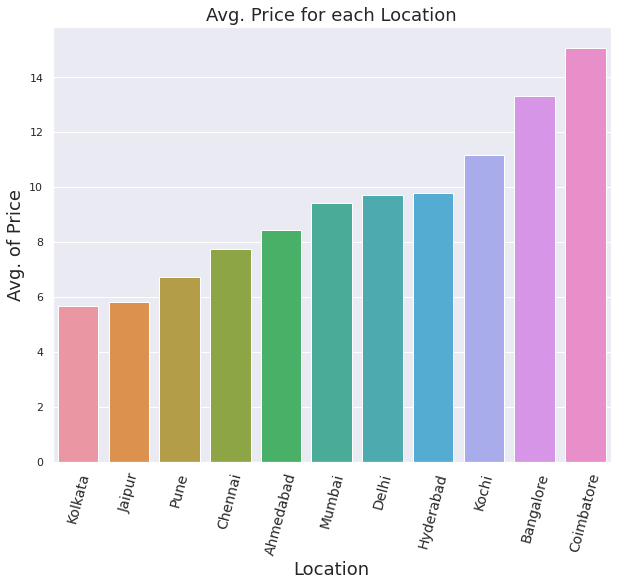

          Price
Year           
1999   0.835000
2000   1.175000
2002   1.294000
1998   1.432500
2001   1.543750
2004   1.941290
2005   2.026842
2003   2.440000
2007   3.215726
2006   3.355897
2008   3.917759
2009   5.177727
2010   5.515497
2011   6.831931
2012   7.324724
2013   8.699353
2014   9.639360
2015  11.215538
2016  11.726149
2017  13.764940
2018  15.726141
2019  19.464118


Text(0.5, 1.0, 'Avg. Price for each Year')

Text(0, 0.5, 'Avg. of Price')

Text(0.5, 0, 'Location')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

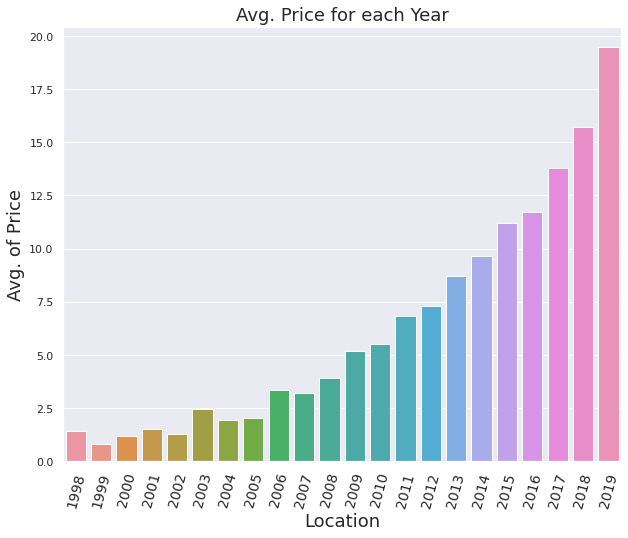

               Price
Fuel_Type           
LPG         2.487000
CNG         3.516786
Petrol      5.702539
Diesel     12.842584
Electric   12.875000


Text(0.5, 1.0, 'Avg. Price for each Fuel_Type')

Text(0, 0.5, 'Avg. of Price')

Text(0.5, 0, 'Location')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

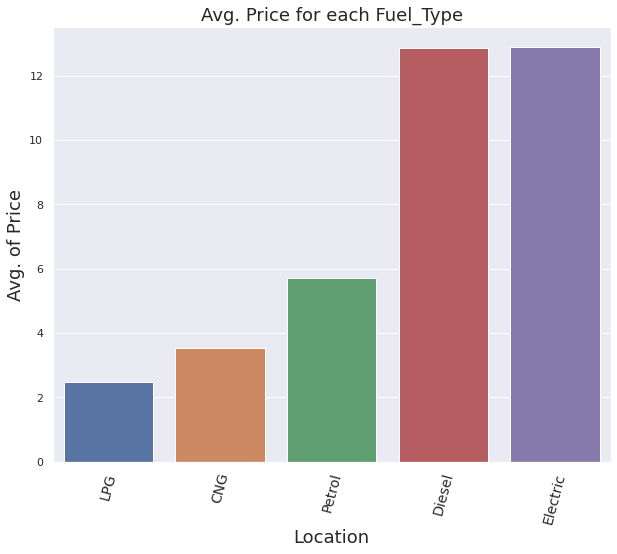

                  Price
Transmission           
Manual         5.333265
Automatic     19.843971


Text(0.5, 1.0, 'Avg. Price for each Transmission')

Text(0, 0.5, 'Avg. of Price')

Text(0.5, 0, 'Location')

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

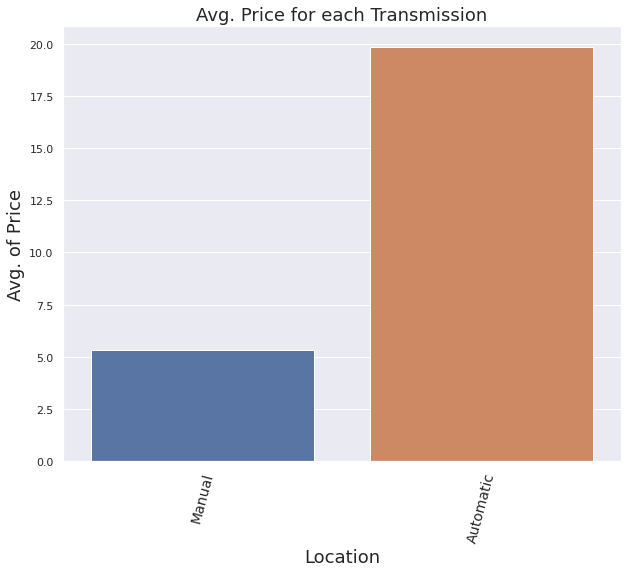

                   Price
Owner_Type              
Fourth & Above  3.280000
Third           5.007257
Second          7.599886
First           9.964814


Text(0.5, 1.0, 'Avg. Price for each Owner_Type')

Text(0, 0.5, 'Avg. of Price')

Text(0.5, 0, 'Location')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

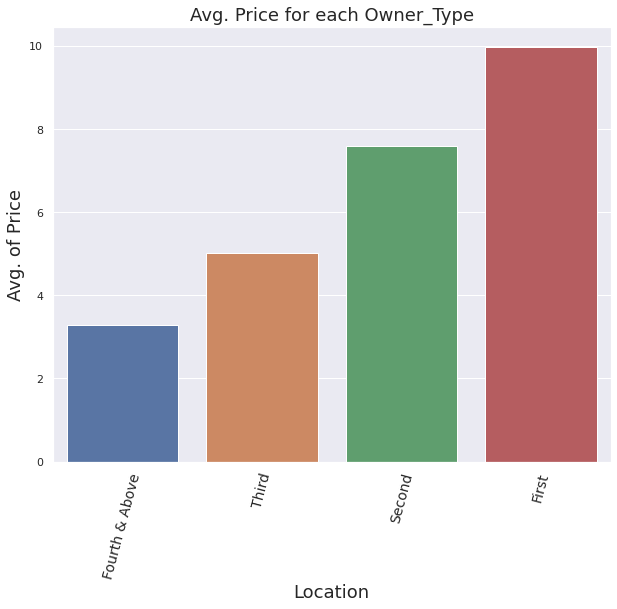

In [23]:
cate_col = ['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type']
for col in cate_col:
  mean_price = train.groupby(col).mean()['Price']
  mean_price = pd.DataFrame(mean_price)
  mean_price = mean_price.sort_values(by = ['Price'])
  print(mean_price)
  sns.set(style = 'darkgrid')
  sns.barplot(mean_price.index, mean_price['Price'], alpha = 1)
  plt.title('Avg. Price for each '+ col, fontsize=18)
  plt.ylabel('Avg. of Price', fontsize=18)
  plt.xlabel('Location', fontsize=18)
  plt.xticks(fontsize=14, rotation = 75)
  fig = plt.gcf()
  fig.set_size_inches(10, 8)
  #plt.grid()
  plt.show()

In [24]:
round(train.corr(),2)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.00,-0.17,0.32,-0.05,0.02,0.02,0.31
Kilometers_Driven,-0.17,1.00,-0.07,0.09,0.03,0.08,-0.01
Mileage,0.32,-0.07,1.00,-0.59,-0.50,-0.30,-0.31
Engine,-0.05,0.09,-0.59,1.00,0.86,0.39,0.66
Power,0.02,0.03,-0.50,0.86,1.00,0.10,0.77
Seats,0.02,0.08,-0.30,0.39,0.10,1.00,0.05
Price,0.31,-0.01,-0.31,0.66,0.77,0.05,1.00


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

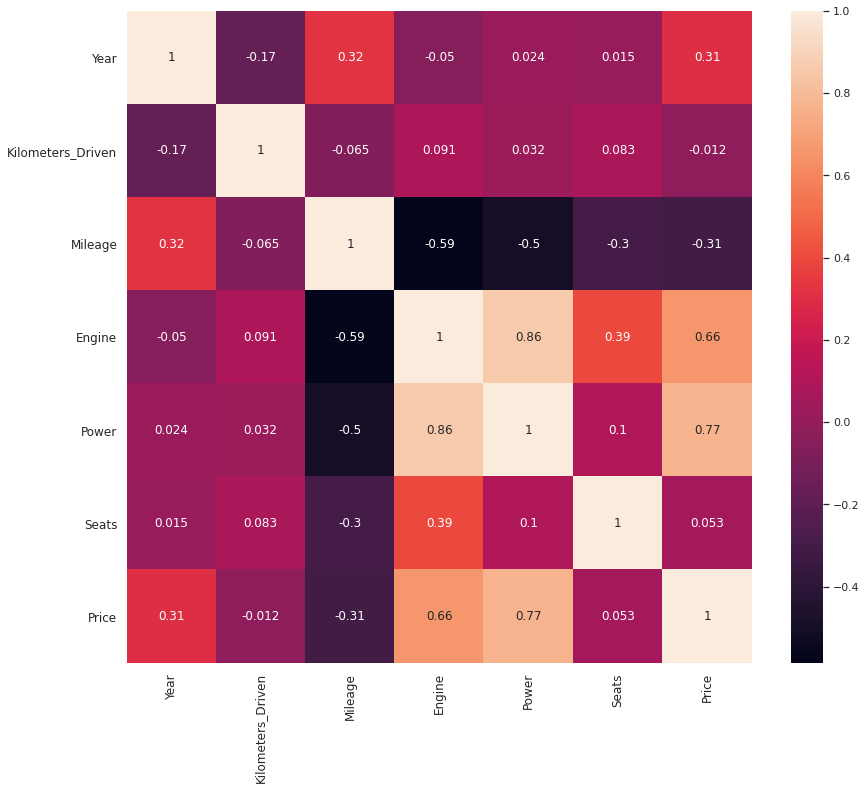

In [25]:
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
fig = plt.gcf()
fig.set_size_inches(14, 12)
plt.show()

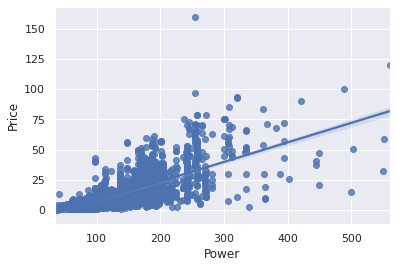

In [26]:
# Largest R^2: 0.77 (price and power)
sns.regplot(x='Power',y='Price',data=train)

## Feature Engineering

In [27]:
# Get all features
features = [column_name for column_name in train.columns if column_name != 'Price']

# Get all categorical features
categorical = [column_name for column_name in features if train[column_name].dtype == 'object']

# Get all numeric columns
numeric = [column_name for column_name in features if column_name not in categorical]

In [28]:
# Print them out and make sure
print(features)
print(categorical)
print(numeric)

['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']


## Modeling

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# Split data between X and label
X = train[features]
y = train['Price']

In [31]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 88)

In [32]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Intialize a scaler
scaler = StandardScaler()

# Transform numerical training and test data
train_numeric_transform = scaler.fit_transform(X_train[numeric])
test_numeric_transform = scaler.transform(X_test[numeric])

# Replace columns in training and testing data accordingly
X_train[numeric] = train_numeric_transform
X_test[numeric] = test_numeric_transform

# One hot encode cat variables
X_train = pd.get_dummies(X_train, columns= categorical, drop_first = True)
X_test = pd.get_dummies(X_test, columns= categorical, drop_first = True)


In [33]:
# Drop column Fuel_Type_Electric
X_train.drop(['Fuel_Type_Electric'], axis = 1, inplace = True)
X_test.drop(['Fuel_Type_Electric'], axis = 1, inplace = True)

### Multiple Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#fit the multiple linear regression model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#intercept
print("The intercept is: ", lr.intercept_)

The intercept is:  13.329736173423255


In [36]:
#coefficient
df_coef = pd.DataFrame(lr.coef_, X_train.columns, columns=['Coefficient'])
df_coef

,Coefficient
Year,3.345829
Kilometers_Driven,0.147396
Mileage,-0.998881
Engine,0.928646
Power,6.193584
Seats,-1.161940
Location_Bangalore,1.682182
Location_Chennai,0.602004
Location_Coimbatore,2.084552
Location_Delhi,-0.484835


In [37]:
#making prediction
y_pred = lr.predict(X_test)

In [38]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
df_pred

,Actual,Predicted
289,6.90,8.621980
5363,16.59,18.327215
2198,3.50,4.896558
1022,3.50,3.463867
5774,1.95,-0.621474
...,...,...
653,20.50,22.196311
4112,3.70,9.031407
2437,3.25,4.558327
626,12.46,13.914307


In [39]:
#Evaluating the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#RMSE has the benefit of penalizing large errors more appropriate in some cases

Mean Absolute Error: 3.6806211291260964
Mean Squared Error: 36.3199191529161
Root Mean Squared Error: 6.02660096181223


### MLR with Bagging

In [40]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

param_grid = {'n_estimators': [200, 400, 600],
              'max_samples': [100, 200]}

lr = LinearRegression()
bag_lr = BaggingRegressor(lr, bootstrap = True, n_jobs = -1, random_state = 0)
grid = GridSearchCV(bag_lr, param_grid, cv = 3)
grid.fit(X_train, y_train)
print('Best Parameters: ', grid.best_params_)

GridSearchCV(cv=3, error_score=nan,
             estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                        fit_intercept=True,
                                                                        n_jobs=None,
                                                                        normalize=False),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=-1,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_samples': [100, 200],
                         'n_estimators': [200, 400, 600]},
             pre_dispatch='2*n_jobs', refit=True,

Best Parameters:  {'max_samples': 200, 'n_estimators': 600}


In [41]:
bag_lr = BaggingRegressor(lr, max_samples = 200, n_estimators = 600, bootstrap = True, n_jobs = -1, random_state = 0)
bag_lr.fit(X_train, y_train)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=200, n_estimators=600, n_jobs=-1, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [42]:
y_pred = bag_lr.predict(X_test)

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.60244928014496
Mean Squared Error: 35.166787866878714
Root Mean Squared Error: 5.930159177195728


### Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {'max_depth': [5, 10, 15],
              'min_samples_split': [2, 3, 4]}

dtr = DecisionTreeRegressor(random_state = 0)
grid = GridSearchCV(dtr, param_grid, cv = 3)
grid.fit(X_train, y_train)
print('Best Parameters: ', grid.best_params_)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

Best Parameters:  {'max_depth': 10, 'min_samples_split': 3}


In [45]:
dtr = DecisionTreeRegressor(max_depth = 10, min_samples_split=3)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.076308055515082
Mean Squared Error: 28.518246322057696
Root Mean Squared Error: 5.340247777215744


### Decision Tree Regressor with Bagging

In [47]:
param_grid = {'max_depth': [5, 10, 15],
              'min_samples_split': [5, 10, 15]}

dtr = DecisionTreeRegressor(random_state = 0)
grid = GridSearchCV(dtr, param_grid, cv = 3)
grid.fit(X_train, y_train)
print('Best Parameters: ', grid.best_params_)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [5, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

Best Parameters:  {'max_depth': 15, 'min_samples_split': 10}


In [48]:
# GridSearch finds the max_samples & n_estimators for BaggingRegressor
param_grid = {'n_estimators': [200, 400, 600],
              'max_samples': [100, 200]}

dtr = DecisionTreeRegressor(max_depth = 15, min_samples_split=10)
bag_dtr = BaggingRegressor(dtr, bootstrap = True, n_jobs = -1, random_state = 0)
grid = GridSearchCV(bag_dtr, param_grid, cv = 3, return_train_score = True)
grid.fit(X_train, y_train)
print('Best Parameters: ', grid.best_params_)

GridSearchCV(cv=3, error_score=nan,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                             criterion='mse',
                                                                             max_depth=15,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=10,
                                                                             min_weight_fra

Best Parameters:  {'max_samples': 200, 'n_estimators': 600}


In [49]:
bag_dtr = BaggingRegressor(dtr, max_samples = 200, n_estimators = 600, bootstrap = True, n_jobs = -1, random_state = 0)
bag_dtr.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=15,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=10,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=Tr

In [50]:
y_pred = bag_dtr.predict(X_test)

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.1697318092240034
Mean Squared Error: 21.460782954501134
Root Mean Squared Error: 4.6325784347921335


### Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators': [10, 20, 30],
              'max_depth': [5, 10, 15],
              'min_samples_split': [5, 10, 15]}

rfr = RandomForestRegressor(random_state = 0)
grid = GridSearchCV(rfr, param_grid, cv = 3)
grid.fit(X_train, y_train)
print('Best Parameters: ', grid.best_params_)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

Best Parameters:  {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 30}


In [53]:
rfr = RandomForestRegressor(n_estimators = 30, max_depth = 15, min_samples_split = 5, random_state = 0)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.5419098055126663
Mean Squared Error: 12.240090380448688
Root Mean Squared Error: 3.4985840536492314


#### Feature Importance

In [55]:
rfr.feature_importances_

array([1.62740247e-01, 4.33100844e-02, 2.34622316e-02, 5.38195015e-02,
       6.63145976e-01, 1.49613406e-02, 1.63831536e-03, 1.15316155e-03,
       2.79466068e-03, 1.74984438e-03, 1.28833722e-02, 2.58674823e-04,
       1.81078865e-03, 1.42226943e-03, 1.50114043e-03, 5.73130175e-04,
       1.68546873e-03, 3.72513606e-07, 2.27833918e-03, 7.21281174e-03,
       1.27934449e-06, 1.18948249e-03, 4.07507722e-04])

In [56]:
columns = X_test.columns.tolist()

for i, imp in enumerate(rfr.feature_importances_):
  print('{}: {:.5f}'.format(columns[i], imp))

#The most important feature is Power and then is the Year.

Year: 0.16274
Kilometers_Driven: 0.04331
Mileage: 0.02346
Engine: 0.05382
Power: 0.66315
Seats: 0.01496
Location_Bangalore: 0.00164
Location_Chennai: 0.00115
Location_Coimbatore: 0.00279
Location_Delhi: 0.00175
Location_Hyderabad: 0.01288
Location_Jaipur: 0.00026
Location_Kochi: 0.00181
Location_Kolkata: 0.00142
Location_Mumbai: 0.00150
Location_Pune: 0.00057
Fuel_Type_Diesel: 0.00169
Fuel_Type_LPG: 0.00000
Fuel_Type_Petrol: 0.00228
Transmission_Manual: 0.00721
Owner_Type_Fourth & Above: 0.00000
Owner_Type_Second: 0.00119
Owner_Type_Third: 0.00041


### Support Vector Regressor
*   *rbf* (Radial Basis Function) kernel: For a non-linear regression, the kernel function transforms the data to a higher dimensional and performs the linear separation.
*   *linear* kernel: For linear regression.


1.   If the number of feature is as large as the sample size -> LR or LinearSVM
2.   If the number of feature is small but sample size is normal -> SVM + rbf
3.   If the number of feature is small but sample size is large, then we need to add some features to become the 1st situation.







In [57]:
from sklearn.svm import SVR

param_grid = {'kernel': ['linear', 'rbf'],
              'C': [0.1, 1, 10],
              'epsilon': [0.1, 1, 10]}

svr = SVR()
grid = GridSearchCV(svr, param_grid, cv = 3)
grid.fit(X_train, y_train)
print('Best Parameters: ', grid.best_params_)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Best Parameters:  {'C': 10, 'epsilon': 1, 'kernel': 'rbf'}


In [58]:
svr = SVR(kernel = 'rbf', C = 10, epsilon = 1)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [59]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.7159053828390358
Mean Squared Error: 16.06919776498892
Root Mean Squared Error: 4.008640388584254


## MSE Summary
> List all the MSE for different ML models to find the best one, here I get **Random Forest Regressor** to get the least **MSE: 12.09**. Therefore, I choose to use Random Forest Regressor to do the prediction.

|Machine Learning Model| MSE |
|----------------------| --- |
|Multiple Linear Regression| 36.32 |
|MLR with Bagging | 35.17 |
|Decision Tree Regressor | 21.51 |
|Decision Tree Regressor with Bagging | 21.46 |
|Random Forest Regressor | 12.24 |
|Support Vector Regressor | 16.07 |



## Prediction
> Predict the car price with *test.csv*.

In [60]:
test.head()
test.shape

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,93.70,5.0
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0


(1234, 10)

In [61]:
# Get all features in test.csv
features_test = [column_name for column_name in test.columns]

# Get all categorical features
categorical_test = [column_name for column_name in features if test[column_name].dtype == 'object']

# Get all numeric columns
numeric_test = [column_name for column_name in features if column_name not in categorical_test]

In [62]:
# Print them out and make sure
print(features_test)
print(categorical_test)
print(numeric_test)

['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']


In [63]:
# Transform numerical training and test data
test_numeric_transform = scaler.fit_transform(test[numeric_test])

# Replace columns in training and testing data accordingly
test[numeric_test] = test_numeric_transform

# One hot encode cat variables
test = pd.get_dummies(test, columns= categorical_test, drop_first = True)

In [64]:
test.head()
test.shape

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0.188672,-0.493990,3.156342,-1.057937,-1.016278,-1.559560,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,-0.125951,-0.112811,1.462341,-1.417398,-1.230343,-0.343064,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,1.132539,-0.688711,-1.006958,1.424479,0.743379,2.089929,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,-0.440574,2.262030,1.213618,-0.406637,-0.319092,-0.343064,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,0.188672,-0.829223,0.073080,-0.703815,-0.532176,-0.343064,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0


(1234, 23)

In [65]:
y_pred = rfr.predict(test)

array([ 3.30939075,  2.93626376, 17.69388074, ...,  2.84589087,
        5.90423236, 16.35928638])

In [66]:
test_predict = pd.DataFrame(y_pred, index = test.index, columns = ['Result_Pred'])
test_predict

,Result_Pred
0,3.309391
1,2.936264
2,17.693881
3,4.377169
4,4.394564
...,...
1229,4.654278
1230,8.062390
1231,2.845891
1232,5.904232
